<a href="https://colab.research.google.com/github/hwangsaeyeon/AAI-Web-Development/blob/main/DNN_with_dataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import pandas as pd

x = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_xData.csv")
x = x.drop(['Unnamed: 0'], axis=1)

y = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_yData.csv")
y = y.drop(['Unnamed: 0'], axis=1)

In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A0      5440 non-null   float64
 1   A1      5448 non-null   float64
 2   A2      5449 non-null   float64
 3   A3      5449 non-null   float64
 4   A4      5420 non-null   float64
 5   A5      5443 non-null   float64
 6   A6      5448 non-null   float64
 7   A7      5442 non-null   float64
 8   A8      5444 non-null   float64
 9   A9      5432 non-null   float64
 10  H0      5445 non-null   float64
 11  H1      5445 non-null   float64
 12  H2      5449 non-null   float64
 13  H3      5447 non-null   float64
 14  H4      5430 non-null   float64
 15  H5      5447 non-null   float64
 16  H6      5446 non-null   float64
 17  H7      5445 non-null   float64
 18  H8      5443 non-null   float64
 19  H9      5438 non-null   float64
dtypes: float64(20)
memory usage: 851.5 KB


In [58]:
x = x.replace(np.nan, 0.01)
x

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9
0,2.37,4.41,-1.62,3.34,5.30,0.61,0.15,-1.28,-1.43,0.33,6.35,1.89,2.63,6.90,8.96,2.20,2.37,-0.47,4.09,-0.01
1,0.09,3.52,0.84,4.46,11.73,0.76,2.19,0.85,0.25,1.03,1.64,1.94,1.34,6.13,-0.41,0.01,1.85,5.51,0.00,2.93
2,0.36,0.01,1.51,4.68,5.25,1.58,-0.53,-0.50,0.78,-0.21,3.28,4.73,3.35,3.34,5.05,-2.16,7.03,-1.02,2.88,-0.87
3,1.58,0.99,-1.84,1.76,1.30,2.29,-0.46,-0.22,1.44,1.80,3.12,6.93,2.11,7.05,5.28,3.30,3.97,1.89,0.55,2.08
4,7.18,2.87,1.33,2.91,-0.56,-0.63,-0.78,-0.24,-0.29,-1.04,3.72,2.51,-2.04,2.50,0.58,0.31,3.68,1.27,-1.03,-0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5444,1.75,1.56,0.70,0.62,2.08,2.86,0.49,-0.58,-0.20,-1.06,4.83,0.63,2.26,4.61,0.78,1.02,-0.30,-0.08,0.57,1.39
5445,3.56,1.95,2.26,2.61,2.06,1.59,1.38,-0.22,0.29,0.23,1.59,2.24,0.35,1.39,0.96,-0.37,0.57,0.09,-0.17,-0.04
5446,1.28,2.62,3.45,3.09,3.52,1.22,0.10,-0.41,0.05,-0.27,-1.35,1.55,0.70,4.54,1.94,0.05,-0.07,-0.38,-0.14,-0.47
5447,3.81,3.04,0.57,2.63,1.75,-0.45,1.05,-0.30,-0.65,-0.69,2.00,1.13,-0.20,0.31,2.97,2.45,1.44,1.31,0.84,0.59


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b20549610>,
      dtype=object)

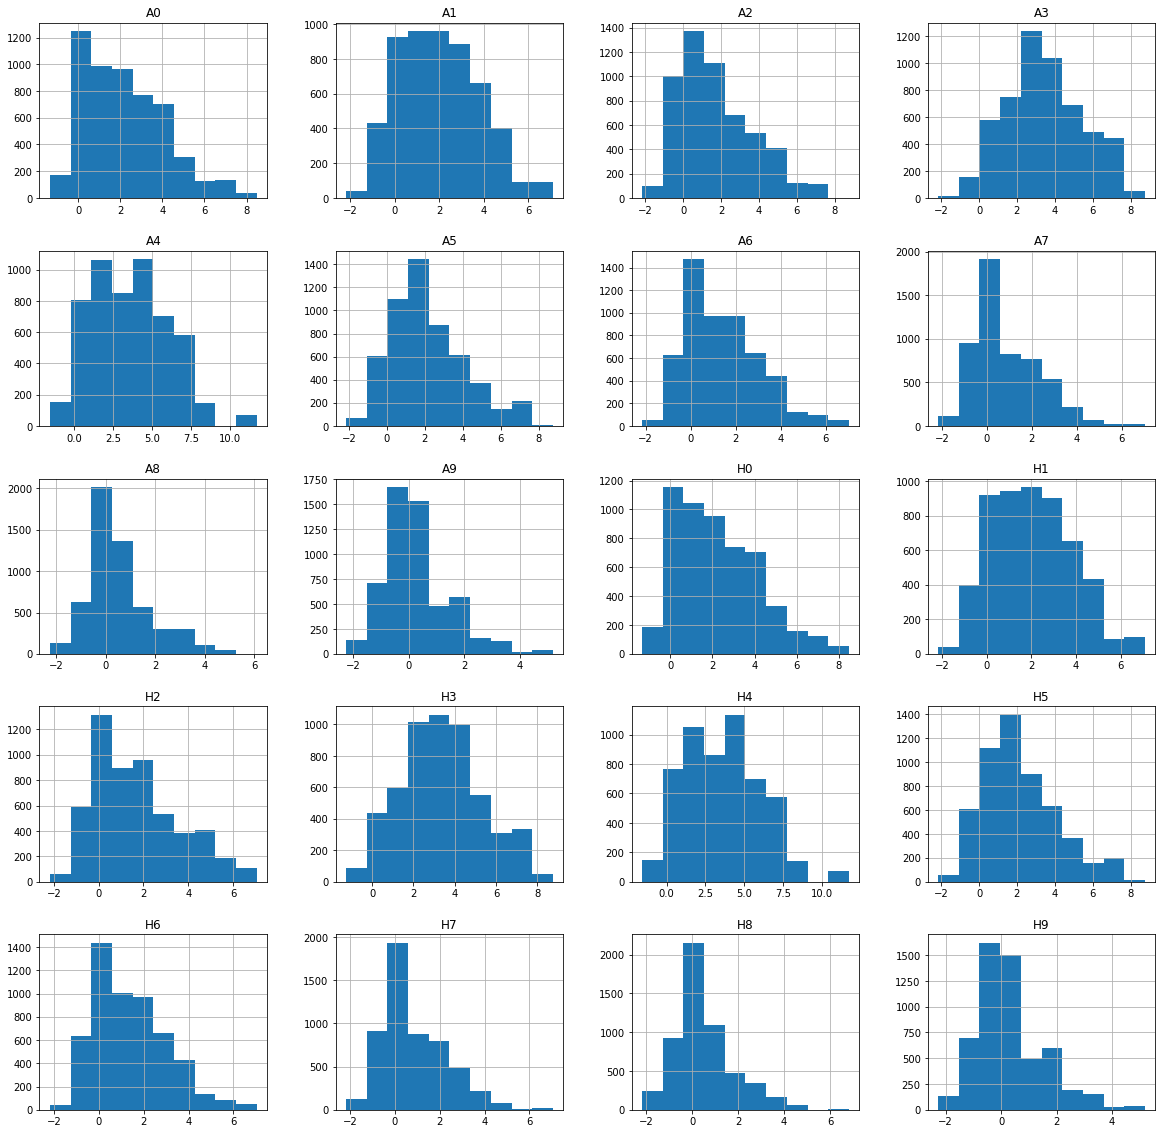

In [59]:
x.hist(figsize=(20,20))

In [60]:
x_away = np.array(x.iloc[:,0:10])
x_home = np.array(x.iloc[:,10:])
x_inv = np.concatenate((x_home,x_away),axis=1)
X = np.concatenate((x,x_inv),axis=0)

In [61]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X.data)

In [62]:
y = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_yData.csv")
y = y.drop(['Unnamed: 0'], axis=1)
y = np.array(y)
import numpy as np
print(np.unique(y,return_counts=True))

inverse_y = np.zeros(len(y))
inverse_y = np.array(inverse_y).reshape(-1,1)

for i in range(len(y)):
  if int(y[i]) == 1:
    inverse_y[i] = 0
  elif int(y[i]) == 0: 
    inverse_y[i] = 1

y = np.concatenate((y,inverse_y),axis=0)
print(np.unique(inverse_y,return_counts=True))

(array([0, 1]), array([2942, 2507]))
(array([0., 1.]), array([2507, 2942]))


In [45]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
#train,val,test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

import tensorflow as tf
input_shape = [X_train.shape[1]]
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape = input_shape),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    #tf.keras.layers.Dense(10,activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid'),])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['binary_accuracy'])
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)
hist = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val,y_val), callbacks=[early_stopping])


(6538, 20) (6538, 1)
(2180, 20) (2180, 1)
(2180, 20) (2180, 1)
Epoch 1/1000
205/205 [==============================] - 1s 3ms/step - loss: 0.6996 - binary_accuracy: 0.4948 - val_loss: 0.6972 - val_binary_accuracy: 0.5050
Epoch 2/1000
205/205 [==============================] - 1s 3ms/step - loss: 0.6983 - binary_accuracy: 0.4945 - val_loss: 0.6963 - val_binary_accuracy: 0.5060
Epoch 3/1000
205/205 [==============================] - 1s 2ms/step - loss: 0.6973 - binary_accuracy: 0.4939 - val_loss: 0.6955 - val_binary_accuracy: 0.5087
Epoch 4/1000
205/205 [==============================] - 1s 3ms/step - loss: 0.6964 - binary_accuracy: 0.4928 - val_loss: 0.6949 - val_binary_accuracy: 0.5110
Epoch 5/1000
205/205 [==============================] - 0s 2ms/step - loss: 0.6956 - binary_accuracy: 0.4939 - val_loss: 0.6943 - val_binary_accuracy: 0.5106
Epoch 6/1000
205/205 [==============================] - 1s 3ms/step - loss: 0.6949 - binary_accuracy: 0.4960 - val_loss: 0.6938 - val_binary_accura

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                672       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [47]:
performance = model.evaluate(X_test, y_test, verbose=1)
print('accuracy:',performance[1], 'loss:', performance[0])

69/69 [==============================] - 0s 1ms/step - loss: 0.6660 - binary_accuracy: 0.6041
accuracy: 0.6041284203529358 loss: 0.6660483479499817


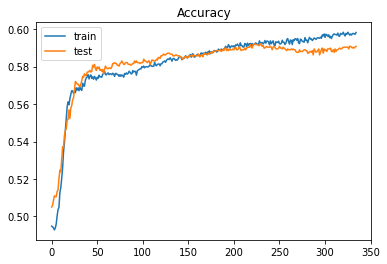

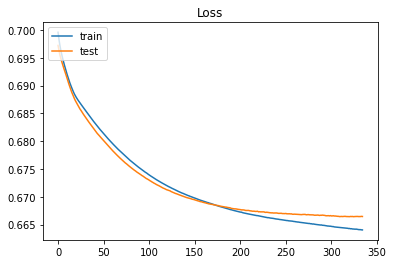

In [48]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [49]:
!pip install -q pyyaml h5py
import os
%tensorflow_version 2.x

model.save('0.604.h5')

In [96]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
#train,val,test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

import tensorflow as tf
input_shape = [X_train.shape[1]]
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape = input_shape),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    #tf.keras.layers.Dense(10,activation='relu'),
    #tf.keras.layers.Dense(4,activation='relu'),
    #tf.keras.layers.Dense(10,activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid'),])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['binary_accuracy'])
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)
hist = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val,y_val), callbacks=[early_stopping])


(5230, 20) (5230, 1)
(1744, 20) (1744, 1)
(1744, 20) (1744, 1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Train on 5230 samples, validate on 1744 samples
Epoch 1/1000
5120/5230 [============================>.] - ETA: 0s - loss: 0.6958 - binary_accuracy: 0.4963

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


5230/5230 [==============================] - 1s 254us/sample - loss: 0.6957 - binary_accuracy: 0.4977 - val_loss: 0.6924 - val_binary_accuracy: 0.5109
Epoch 2/1000
5230/5230 [==============================] - 0s 68us/sample - loss: 0.6912 - binary_accuracy: 0.5298 - val_loss: 0.6887 - val_binary_accuracy: 0.5482
Epoch 3/1000
5230/5230 [==============================] - 0s 65us/sample - loss: 0.6878 - binary_accuracy: 0.5623 - val_loss: 0.6857 - val_binary_accuracy: 0.5545
Epoch 4/1000
5230/5230 [==============================] - 0s 67us/sample - loss: 0.6845 - binary_accuracy: 0.5771 - val_loss: 0.6827 - val_binary_accuracy: 0.5614
Epoch 5/1000
5230/5230 [==============================] - 0s 65us/sample - loss: 0.6813 - binary_accuracy: 0.5836 - val_loss: 0.6796 - val_binary_accuracy: 0.5751
Epoch 6/1000
5230/5230 [==============================] - 0s 64us/sample - loss: 0.6787 - binary_accuracy: 0.5843 - val_loss: 0.6775 - val_binary_accuracy: 0.5791
Epoch 7/1000
5230/5230 [==========

In [97]:
performance = model.evaluate(X_test, y_test, verbose=1)
print('accuracy:',performance[1], 'loss:', performance[0])

accuracy: 0.5888761 loss: 0.6674850391685416


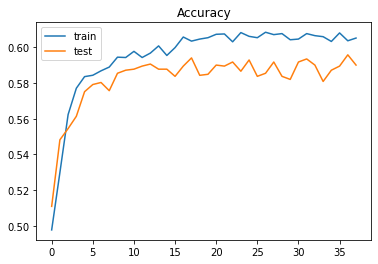

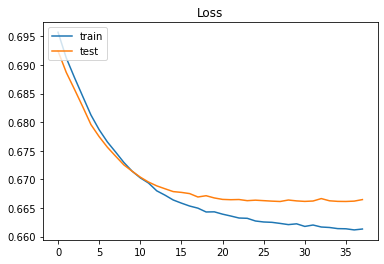

In [98]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
# 예측하기, 확률값으로 반환됨
y_pred_probs = model.predict(X_test)

# 0또는 1로 변경
y_preds = [1 if x>0.5 else 0 for x in y_pred_probs]

#성능 평가
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(roc_auc_score(y_test, y_preds))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[523 358]
 [359 504]]
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59       881
         1.0       0.58      0.58      0.58       863

    accuracy                           0.59      1744
   macro avg       0.59      0.59      0.59      1744
weighted avg       0.59      0.59      0.59      1744

0.5888264284107784


In [63]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

from sklearn.model_selection import train_test_split
#train,val,test split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


n_fold = 5
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state =seed)
accuracy = []
performance = []
binary_accuracy = []
val_binary_accuracy = []
loss = []
val_loss = []
for train, test in skf.split(X,y):

  model = Sequential()
  model.add(Dense(32,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(4,activation='relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001), metrics = ['binary_accuracy'])

  print(X[train].shape)
  print(X[test].shape)

  from keras.callbacks import EarlyStopping

  hist = model.fit(X[train], y[train], epochs = 1000, validation_data=(X[test],y[test]), callbacks= [EarlyStopping(patience=10)])
  binary_accuracy.append(hist.history['binary_accuracy'])
  val_binary_accuracy.append(hist.history['val_binary_accuracy'])
  loss.append(hist.history['loss'])
  val_loss.append(hist.history['val_loss'])
  k_accuracy = "%.4f" %(model.evaluate(X[train], y[train])[1])
  accuracy.append(k_accuracy)

  perform = model.evaluate(X[test],y[test])
  performance.append(perform)

print("\n %.f fold accuracy : "%(n_fold), accuracy)

(6974, 20)
(1744, 20)
Train on 6974 samples, validate on 1744 samples
Epoch 1/1000
6974/6974 [==============================] - 0s 67us/sample - loss: 0.6912 - binary_accuracy: 0.5191 - val_loss: 0.6917 - val_binary_accuracy: 0.5229
Epoch 2/1000
2592/6974 [==========>...................] - ETA: 0s - loss: 0.6913 - binary_accuracy: 0.5258

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6974/6974 [==============================] - 0s 48us/sample - loss: 0.6909 - binary_accuracy: 0.5271 - val_loss: 0.6914 - val_binary_accuracy: 0.5275
Epoch 3/1000
6974/6974 [==============================] - 0s 49us/sample - loss: 0.6906 - binary_accuracy: 0.5297 - val_loss: 0.6911 - val_binary_accuracy: 0.5241
Epoch 4/1000
6974/6974 [==============================] - 0s 51us/sample - loss: 0.6903 - binary_accuracy: 0.5334 - val_loss: 0.6908 - val_binary_accuracy: 0.5287
Epoch 5/1000
6974/6974 [==============================] - 0s 51us/sample - loss: 0.6899 - binary_accuracy: 0.5344 - val_loss: 0.6905 - val_binary_accuracy: 0.5304
Epoch 6/1000
6974/6974 [==============================] - 0s 48us/sample - loss: 0.6896 - binary_accuracy: 0.5363 - val_loss: 0.6902 - val_binary_accuracy: 0.5344
Epoch 7/1000
6974/6974 [==============================] - 0s 49us/sample - loss: 0.6893 - binary_accuracy: 0.5410 - val_loss: 0.6899 - val_binary_accuracy: 0.5321
Epoch 8/1000
6974/6974 [===========

In [64]:
print(performance)

[[0.669360934047524, 0.60951835], [0.6599241221716644, 0.603211], [0.6638395305073589, 0.61066514], [0.678685313623935, 0.5742972], [0.664238231967252, 0.59552497]]


In [65]:
print(model.evaluate(X_test,y_test))

[0.6689596084279752, 0.59541285]
